
# <font style="color: #d60e8c; text-align:center;">Práctica 5: Redes neuronales convolucionales

- Autor 1:
- Autor 2:

# <font style="color: #d60e8c; text-align:center;">Introducción
<hr style="border: 0.5px solid #d60e8c;">

## Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils 

In [ ]:
SEED_VALUE = 0

# Fijamos al semilla para hacer determinista el entrenamiento.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
tf.keras.utils.set_random_seed(SEED_VALUE)

tf.config.experimental.enable_op_determinism()


## Cargamos los datos


In [ ]:
from keras.datasets import mnist
# Cargar las imágenes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Normalizar las imagenes de escala de grises 0–255 (entre 0 –1):
X_train = X_train / 255 
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos:
y_train_cat = utils.to_categorical (y_train) 
y_test_cat = utils.to_categorical (y_test)

In [ ]:
_, n_rows, n_cols = X_train.shape
channels = 1

n_rows, n_cols, channels

(28, 28, 1)

## Exploramos los datos

Número de clases :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Clase : 7')

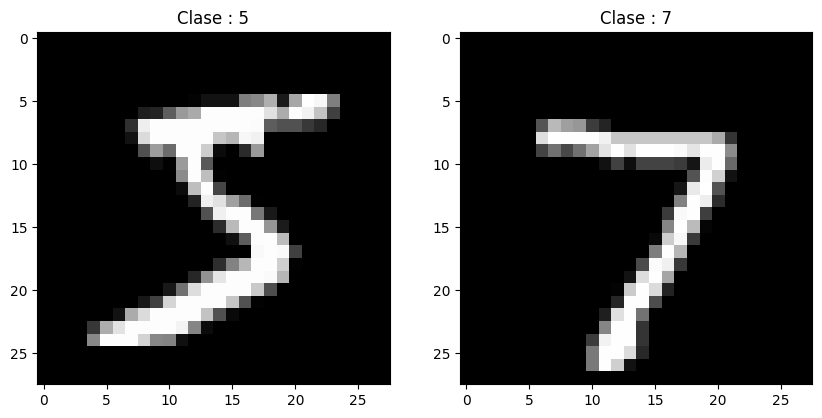

In [ ]:
# Número de clases
classes = np.unique(y_train)
num_classes = y_train_cat[0].shape[0]

print('Número de clases : ', num_classes)
print('Clases : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title(f"Clase : {y_train[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title(f"Clase : {y_test[0]}")

In [ ]:
print(f"Muestras entrenamiento: {X_train.shape[0]}")
print(f"Muestras test: {X_test.shape[0]}")
print(f"Total muestras: {X_train.shape[0] + X_test.shape[0]}")

Muestras entrenamiento: 60000
Muestras test: 10000
Total muestras: 70000


# <font style="color: #d60e8c;">Creamos el modelo
<hr style="border: 0.5px solid #d60e8c;">

Para implementar la CNN, añadiremos capas Convolucionales seguidas de capas de Max Pooling. Usaremos también Dropout para evitar el sobreentrenamniento. Finalmente, añadiremos un capa completamente conectada (Dense).


Información adicional sobre CNN:
- https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [ ]:
  model = keras.Sequential()

  model.add(layers.Conv2D(32, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
  model.add(layers.Conv2D(32, (3, 3),  activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Flatten ())
  model.add(layers.Dense(64, activation="relu")) 
  model.add(layers.Dropout(0.2))
  # Capa de salida:
  model.add(layers.Dense(num_classes, activation="softmax"))
 
  model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
  model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 8, 8, 64)          36928     
                                                     

In [ ]:
max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

Epoch 1/100
10/10 [==============================] - 3s 125ms/step - loss: 2.0613 - accuracy: 0.2825 - val_loss: 1.3789 - val_accuracy: 0.5863
Epoch 2/100
10/10 [==============================] - 1s 101ms/step - loss: 1.2959 - accuracy: 0.5372 - val_loss: 0.9048 - val_accuracy: 0.6811
Epoch 3/100
10/10 [==============================] - 1s 101ms/step - loss: 0.9450 - accuracy: 0.6594 - val_loss: 0.7382 - val_accuracy: 0.7294
Epoch 4/100
10/10 [==============================] - 1s 101ms/step - loss: 0.7822 - accuracy: 0.7123 - val_loss: 0.6504 - val_accuracy: 0.7534
Epoch 5/100
10/10 [==============================] - 1s 100ms/step - loss: 0.6987 - accuracy: 0.7412 - val_loss: 0.5911 - val_accuracy: 0.7735
Epoch 6/100
10/10 [==============================] - 1s 100ms/step - loss: 0.6357 - accuracy: 0.7620 - val_loss: 0.5420 - val_accuracy: 0.7975
Epoch 7/100
10/10 [==============================] - 1s 101ms/step - loss: 0.5952 - accuracy: 0.7778 - val_loss: 0.5122 - val_accuracy: 0.8130

In [ ]:
# Evaluacion del modelo utilizando los datos de test: 
scores = model.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

Exactitud del modelo: 0.9114999771118164


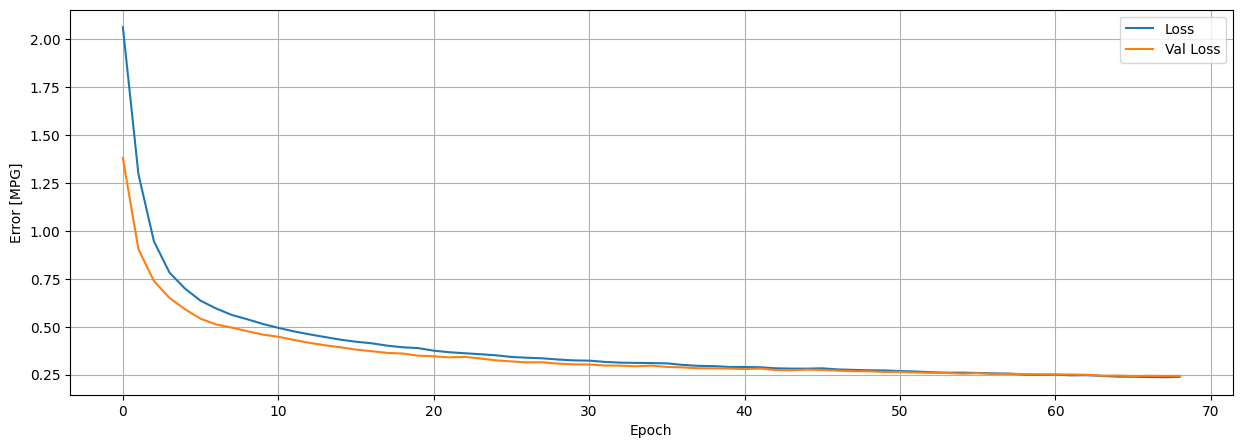

In [ ]:
  plt.figure(figsize=(15,5))
  plt.plot(fit_history.history['loss'], label='Loss')
  plt.plot(fit_history.history['val_loss'], label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

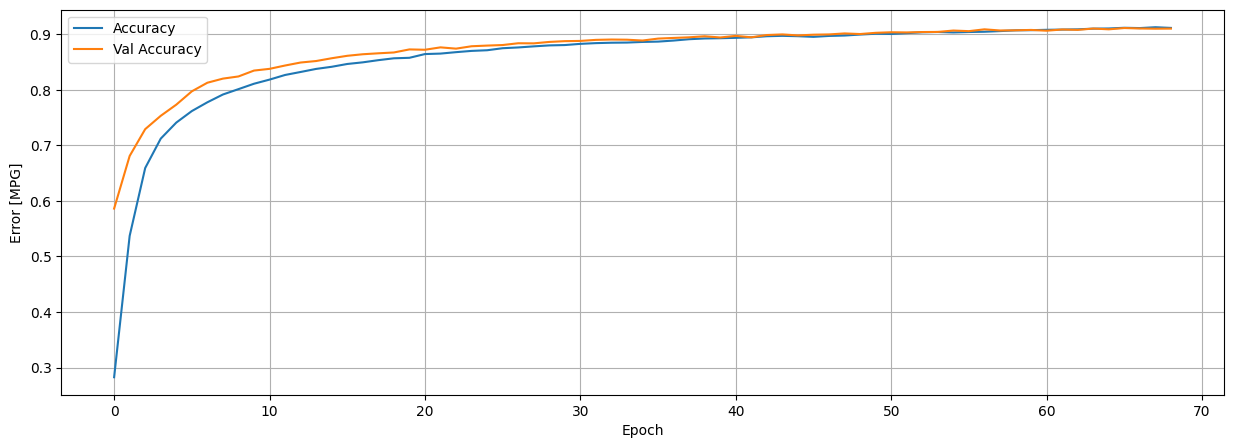

In [ ]:
  plt.figure(figsize=(15,5))
  plt.plot(fit_history.history['accuracy'], label='Accuracy')
  plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Aplica la red anterior al conjunto de datos <b>fashion_mnist</b>.</li>
        <li>Realiza cambios en las capas convolucionales (añadiendo capas y/o modificando los parámetros)</li>
        <li>Reponde las siguientes preguntas: 
           <ul>
              <li>¿Qué ocurre con el tamaño de la imagen tras pasar por las capas convolucionales?</li>
              <li>Mira la documentación de las capa <a href="https://keras.io/api/layers/convolution_layers/convolution2d/">Conv2D</a>: ¿qué parametro o parámetros afectan al tamaño de la salida de la capa convolucional? Escribe el nombre y el efecto que produce.</li>
              <li>¿Para qué crees que sirve el número de filtros de las capas convolucionales?</li>              
           </ul>
        </li>        
    </ul>
</div>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist





